# Solving Stochastic Partial Differential Equations
***
## Introduction

We consider an underlying process $S(t)$ described by the sde
$$
dS(t) = a(S,t) dt + b(S,t)dW
$$
A scenario is a set of values $\hat S^j (t_i), \> i=1,\dots,I$ that are an approximation to the $j-th$ realization,$S^j (t_i)$, 
of the solution of the sde evaluated at times $0 \le t_i \le T, \> i=1,\dots,I$.
A scenario is also called a trajectory. A trajectory can be visualized as a line in the state-vs-time plane describing the path 
followed by a realization of the stochastic process (actually by an approzimation to the stochastic process).

For example, the Black and Scholes model assumes a market in which the tradable assets are:

1. A risky asset, whose evolution is driven by a geometric brownian motion
\begin{equation}
dS = \mu S dt + \sigma S dw \Rightarrow S(T)=S(t_0) e^{(\mu-\frac{1}{2} \sigma^2) (T-t_0) + \sigma[w(T) - w(t_0)]}
\end{equation}

2. The money market account, whose evolution is deterministic
\begin{equation}
dB=Brdt \Rightarrow B(T) = B(t_0) e^{r(T-t_0)}
\end{equation}

There are several ways to construct scenario for pricing
1. Constructing a path of the solution to the SDE at times ti by exact advancement of the solution; 
\begin{itemize}
This method is only possible if we have an analytical expression for the solution of the stochastic differential equation

2. Approximate numerical solution of the stochastic differential equation; 
This is the method of choice if we cannot use the previous one. Just as in the case of ODE there are numerical techniques for discretizing and solving SDE.
---
## Exact Solution Advancement

Example: Log-normal process with constant drift and volatility

$$\text{SDE} \Rightarrow \frac{dS}{S} = \mu dt + \sigma dw$$

<img src="img/down_arrow.jpg" width="5%" height="5%">

$$\text{SOLUTION} \Rightarrow S(T)=S(t_0) e^{(\mu-\frac{1}{2} \sigma^2) (T-t_0) + \sigma[w(T) - w(t_0)]}$$

How to obtain a sequence of Wiener process?

$$
w(t_i) = w(t_{i-1}) + \sqrt{t_i - t_{i-1}} Z \quad Z \sim N(0,1)
$$

Defining the outcomes of successive drawings of the random variable $Z$ corresponding to the $j-th$ trajectory by $Z^j_i$, we get the following recursive expression for the $j-th$ trajectory of $S(t)$:

$$
S^j(t_i) = S^j(t_{i-1}) exp \left[ \left( \mu - \frac{1}{2} \sigma^2 \right)
(t_i - t_{i-1}) + \sigma \sqrt{t_i - t_{i-1}} Z^j_i \right]
$$

Some observations are in order:

1. The set $w(t_i)$ must be viewed as the components of a vector of random variables with a multidimensional distribution. This means that for a fixed $j$ $Z_j^i$ are realizations of a multidimensional standard normal random variable which happen to be independent;

2. Wheter we view the $Z_j^i$ as coming from a multidimensional distribution of independent normals or as drawings from a single one-dimensional distribution does not affect the outcome as long as the $Z_j^i$ are generated from pseudo-random numbers;

3. This distinction, however, is conceptually important and \textbf{it becomes essential if we generate the $Z_j^i$ not from pseudo-random numbers but from quasi-random sequences}.
---
## Numerical Integration of SDE

The numerical integration of the SDE by finite difference is another way of generating scenarios for pricing. In the case of the numerical integration of ordinary differential equations by finite differences the numerical scheme introduces a discretization  error that translates into the numerical solution differing from the exact solution by an amount proportional to a power of the time step. This amount is the truncation error of the numerical scheme. 

In the case of the numerical integration of SDE by finite differences the interpretation of the numerical error introduced by the discretization scheme is more complicated. Unlike the case of ODE where the only thing we are interested in computing is the solution itself, when dealing with SDE there are two aspects that interest us:

1. One aspect is *the accuracy with which we compute the trajectories or paths* of a realization of the solution
2. The other aspect is *the accuracy with which we compute functions of the process* such as expectations and moments.

The order of accuracy with which a given scheme can approximate trajectories of the solution is not the same as the accuracy with which the same scheme can approximate expectations and moments of functions of the trajectories. The convergence of the numerically computed trajectories to the exact trajectories is called **strong convergence** and the order of the corresponding numerical scheme is called order of strong convergence. The convergence of numerically computed functions of the stochastic process to the exact values is called **weak convergence** and the related order is called order of weak convergence.

The two most popular schemes for integrating a SDE are the Explicit Euler scheme and the Milshtein scheme. Let's assume the following SDE

$$dS(t) = a(S,t)dt + b(s,t)dw$$

<img src="img/down_arrow.jpg" width="5%" height="5%">

$$ \text{EULER} \Rightarrow \hat S(t_{i+1}) = \hat S(t_i) + a[\hat S(t_i), t_i]
\Delta t + b[\hat S(t_i), t_i ] \left( w(t_{i+1}) - w(t_i) \right) $$

<img src="img/down_arrow.jpg" width="5%" height="5%">

$$\text{MILSHSTEIN} \Rightarrow \text{EULER} + \frac{1}{2} b[\hat S(t_i), t_i] 
\frac{\partial b[\hat S(t_i), t_i]}{\partial S} 
\left[ \left( w(t_{i+1}) - w(t_i) \right)^2 - \Delta t  \right]$$

#### Exact Solution

In [57]:
%matplotlib inline

from pylab import *
from matplotlib import pyplot as pl

# Simulate a number of years of daily stock quotes
# Stock Parameters
S0  = 100.0 # initial index level
T   = 10.0  # time horizon (years)
r   = 0.05  # risk -less short rate
vol = 0.40  # instantaneous volatility

# Simulation Parameters
#seed(1000)
M  = 1024         # time steps
I  = 1            # index level paths
dt = T / M        # time interval
df = exp(-r * dt) # discount factor

# Stock Price Paths
rand = standard_normal ((M + 1, I)) # random numbers
S = zeros_like(rand)                # stock matrix
S[0, :] = S0                        # initial values
times = range(1, M + 1, 1)
for t in times:        # stock price paths
    S[t, :] = S[t - 1, :] * exp((r - vol ** 2 / 2)
        * dt + vol * rand[t, :] * sqrt(dt))

times = [0] + times
time_labels = [float(t) * dt for t in times]

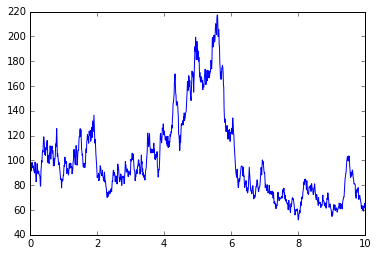

In [58]:
pl.plot(time_labels, S[:,0])

In our case, we have simply
$$a(S,t) = Sr$$
and
$$b(S,t) = S \sigma$$
$$\frac{\partial b(S,t)}{\partial S} = \sigma$$


#### Euler Approximation

In [65]:
nstep = 32
delta_approx = M / nstep

euler = zeros_like(rand)
euler[0, :] = S0  # initial values
y_prev      = S0
t_prev      = 0

for k in range(1, nstep+1):
    dwti = 0
    delta_t = (times[k*delta_approx] - times[(k-1)*delta_approx])*dt
    
    for t in times[(k-1)*delta_approx+1: k*delta_approx+1]:
        dwti = dwti + rand[t, :] * sqrt(dt)
    
    euler[k*delta_approx,0] = y_prev * (1 +  r * delta_t +  vol * dwti) 
    
    for l in range(1, delta_approx):
        euler[(k-1)*delta_approx + l] = y_prev + l * (euler[k*delta_approx,0] - y_prev) / delta_approx
    
    y_prev = euler[t,0]    

#### Milshstein Approximation

In [66]:
milshstein = zeros_like(rand)
milshstein[0, :] = S0  # initial values
y_prev      = S0
t_prev      = 0

for k in range(1, nstep+1):
    dwti = 0
    delta_t = (times[k*delta_approx] - times[(k-1)*delta_approx])*dt
    
    for t in times[(k-1)*delta_approx+1: k*delta_approx+1]:
        dwti = dwti + rand[t, :] * sqrt(dt)
    
    milshstein[k*delta_approx,0] = y_prev * (1 +  r * delta_t +  vol * dwti) + 0.5* y_prev * vol * vol * (dwti*dwti-delta_t)
    
    for l in range(1, delta_approx):
        milshstein[(k-1)*delta_approx + l] = y_prev + l * (milshstein[k*delta_approx,0] - y_prev) / delta_approx
    
    y_prev = milshstein[t,0]    

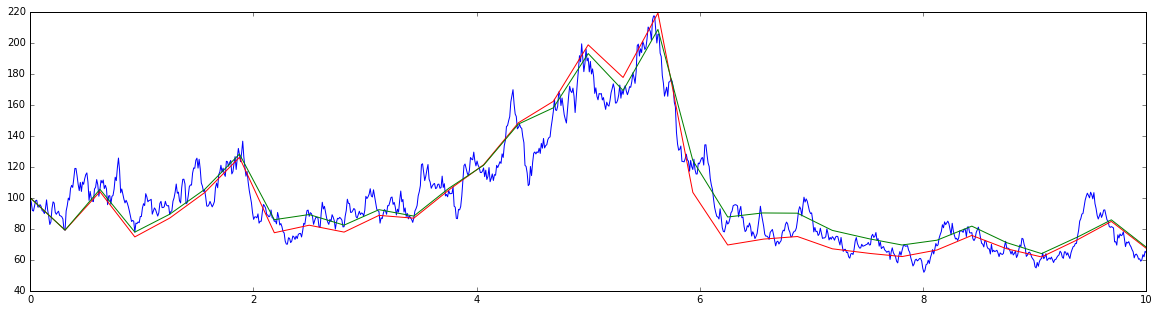

In [67]:
pl.figure(figsize=(20,5))
pl.plot(time_labels, S[:,0])
pl.plot(time_labels, euler[:,0], color='red')
pl.plot(time_labels, milshstein[:,0], color='green')
pl.show()

## References

http://www.frouah.com/finance%20notes/Euler%20and%20Milstein%20Discretization.pdf